<a href="https://colab.research.google.com/github/rikiindrmwn/all-about-data/blob/main/Prediksi%20Temperatur%20Udara%20Menggunakan%20Exponential%20Smoothing%5CPrediksi_Temperatur_Menggunakan_Exponential_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Library yang dibutuhkan
# !pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.6 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32195 sha256=2f4651719a85984d26b3ee0bd329f3bb6954c85d6451bea460d80e0b22ca395c
  Stored in directory: /root/.cache/pip/wheels/ea/b3/7d/0a33c9f0e642e714df1e619df91370950750a14afea5705565
Successfully built jcopml


In [2]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from jcopml.time_series.decomposition import additive_decomposition
from jcopml.time_series.decomposition import multiplicative_decomposition
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series import auto_ets

In [3]:
# Load data training
df_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv', 
                       index_col='date', 
                       parse_dates=True, 
                       usecols=['date', 'meantemp'])
df_train.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [4]:
# Mengubah nama kolom agar lebih readable
df_train.columns = ['temperature']

In [5]:
# Check NA Values
df_train.isna().sum()

temperature    0
dtype: int64

In [6]:
# Mengecek jangkauan waktu data berdasarkan indexnya
print(f'Start : {df_train.index[0]}')
print(f'End : {df_train.index[-1]}')

Start : 2013-01-01 00:00:00
End : 2017-01-01 00:00:00


In [7]:
# Check jumlah panjang data
print(f'Jumlah data : {len(df_train)}')

Jumlah data : 1462


In [8]:
# Melakukan resample data dari Harian menjadi Bulanan dengan melakukan rata-rata
sr_train = df_train.temperature.resample('M').mean()
sr_train.head()

date
2013-01-31    12.074770
2013-02-28    16.867560
2013-03-31    22.814209
2013-04-30    28.895119
2013-05-31    33.776767
Freq: M, Name: temperature, dtype: float64

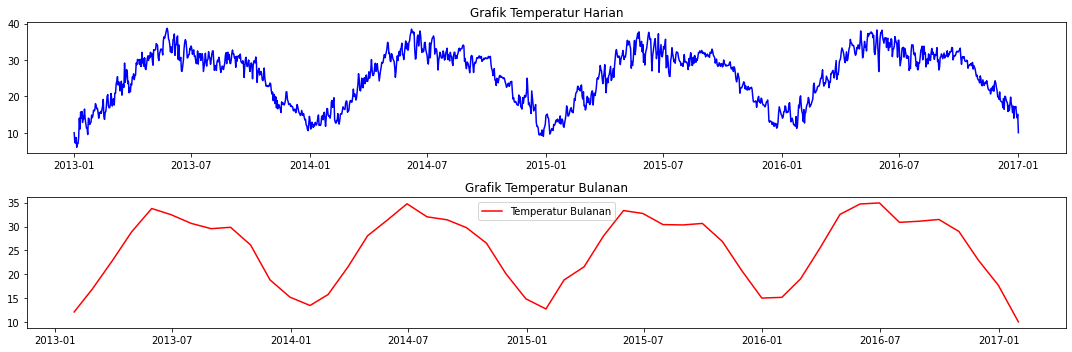

In [9]:
# Plotting data temperatur harian dan bulanan
fig, [ax, ax2] = plt.subplots(figsize=(15,5), nrows=2)

ax.plot(df_train, 'b-', label='Temperatur Harian')
ax.set_title('Grafik Temperatur Harian')

ax2.plot(sr_train, 'r-', label='Temperatur Bulanan')
ax2.set_title('Grafik Temperatur Bulanan')

plt.tight_layout()
plt.legend()
plt.show()

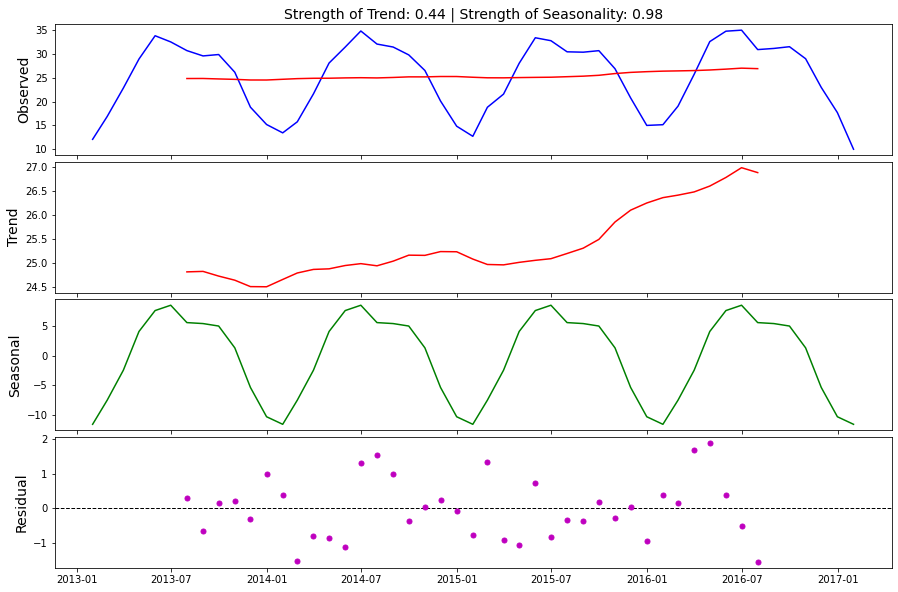

In [10]:
# Melakukan dekomposisi untuk melihar trand, seasonal dan residual pada data
# Additive Decomposition
add_dc = additive_decomposition(sr_train, plot=True)

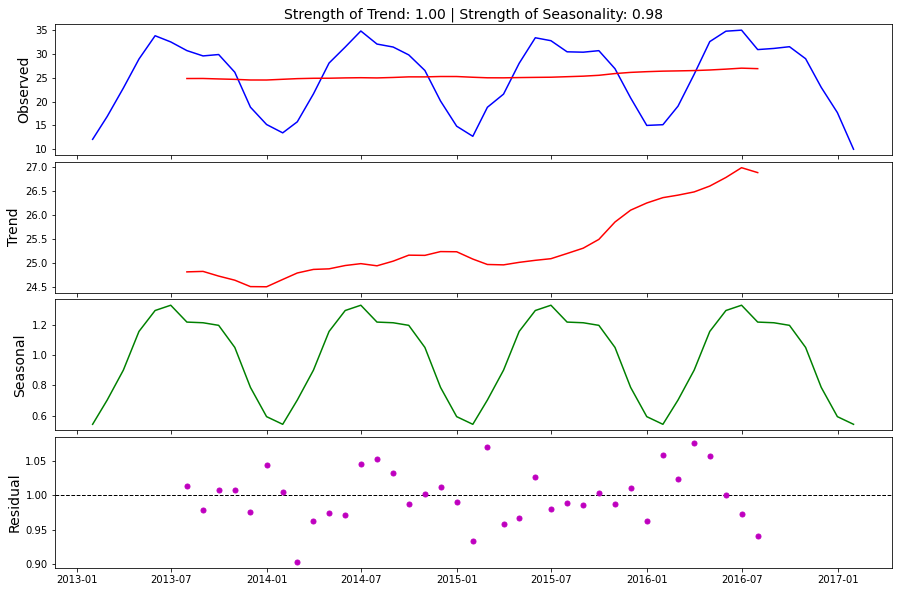

In [11]:
# Multiplicative Decomposition
add_dc = multiplicative_decomposition(sr_train, plot=True)

In [12]:
# import data testing
df_test = pd.read_csv('/content/DailyDelhiClimateTest.csv', 
                       index_col='date', 
                       parse_dates=True, 
                       usecols=['date', 'meantemp'])
df_test.head()

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


In [13]:
# Mengubah nama kolom agar lebih readable
df_test.columns = ['temperature']

In [14]:
# Check NA Values
df_test.isna().sum()

temperature    0
dtype: int64

In [15]:
# Mengecek jangkauan waktu data berdasarkan indexnya
print(f'Start : {df_test.index[0]}')
print(f'End : {df_test.index[-1]}')

Start : 2017-01-01 00:00:00
End : 2017-04-24 00:00:00


In [16]:
# Check jumlah panjang data
print(f'Jumlah data : {len(df_test)}')

Jumlah data : 114


In [17]:
# Melakukan resample data dari Harian menjadi Bulanan dengan melakukan rata-rata
sr_test = df_test.temperature.resample('M').mean()
sr_test.head()

date
2017-01-31    15.710873
2017-02-28    18.349981
2017-03-31    23.753760
2017-04-30    30.753663
Freq: M, Name: temperature, dtype: float64

In [18]:
# Model Exponential Smoothing dengan skema 1
model_1 = ExponentialSmoothing(sr_train, seasonal="add", seasonal_periods=12, trend='mul')
model_1 = model_1.fit(optimized=True)

In [19]:
# Menentukan titik awal dan akhir forecasting
start_forecast = len(sr_train[:-1])
end_forecast = len(sr_train[:-1]) + len(sr_test) + 19

# Melakukan prediksi menggunakan model dengan skema 1
pred_1 = model_1.predict(start_forecast, end_forecast)

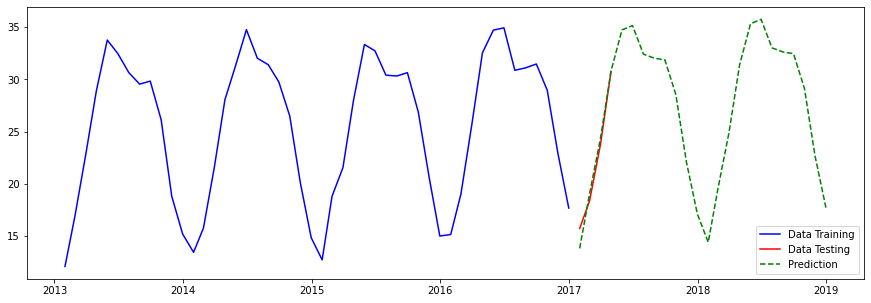

In [20]:
# Memplotting data training, data testing dan hasil prediksi
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(sr_train[:-1], 'b-', label='Data Training')
ax.plot(sr_test, 'r-', label='Data Testing')
ax.plot(pred_1, 'g--', label='Prediction')

plt.legend()
plt.show()

In [41]:
# Menampilkan data hasil prediksi oleh model 1
pred_1

2017-01-31    13.803540
2017-02-28    19.026310
2017-03-31    24.335136
2017-04-30    30.800236
2017-05-31    34.742168
2017-06-30    35.162910
2017-07-31    32.427317
2017-08-31    32.035967
2017-09-30    31.870031
2017-10-31    28.552596
2017-11-30    22.098921
2017-12-31    17.111000
2018-01-31    14.395256
2018-02-28    19.619113
2018-03-31    24.929028
2018-04-30    31.395219
2018-05-31    35.338244
2018-06-30    35.760081
2018-07-31    33.025585
2018-08-31    32.635334
2018-09-30    32.470498
2018-10-31    29.154166
2018-11-30    22.701597
2018-12-31    17.714782
Freq: M, dtype: float64

In [26]:
# Model Exponential Smoothing dengan skema 2
model_2 = ExponentialSmoothing(sr_train, seasonal="mul", seasonal_periods=12, trend='add')
model_2 = model_2.fit(optimized=True)

In [27]:
# Melakukan prediksi menggunakan model dengan skema 2
pred_2 = model_2.predict(start_forecast, end_forecast)

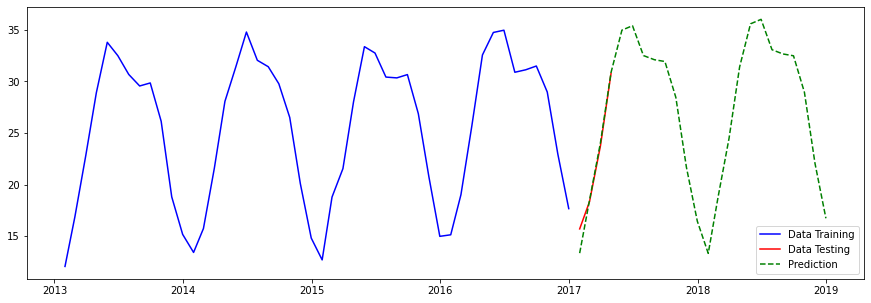

In [28]:
# Memplotting data training, data testing dan hasil prediksi
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(sr_train[:-1], 'b-', label='Data Training')
ax.plot(sr_test, 'r-', label='Data Testing')
ax.plot(pred_2, 'g--', label='Prediction')

plt.legend()
plt.show()

In [40]:
# Membuat data frame untuk menampung hasil prediksi model 1 dan model 2
dict_hasil_prediksi = {'Skema 1' : pred_1,
                       'Skema 2' : pred_2}
hasil_prediksi = pd.DataFrame(dict_hasil_prediksi)
hasil_prediksi

,Skema 1,Skema 2
2017-01-31,13.803540,13.362368
2017-02-28,19.026310,18.485383
2017-03-31,24.335136,24.052470
2017-04-30,30.800236,30.845837
2017-05-31,34.742168,34.955688
2017-06-30,35.162910,35.381740
2017-07-31,32.427317,32.492813
2017-08-31,32.035967,32.091110
2017-09-30,31.870031,31.916856
2017-10-31,28.552596,28.444669


**KESIMPULAN**


1.   Model Exponential Smoothing menghasilkan prediksi yang cukup akurat untuk studi kasus "Forecasting temperatur udara di kota delhi, India", yang ditunjukkan dari hasil plotting dari data training, testing dan prediksi yang sangat bersesuaian
2.   Dua model yang dibuat dengan skema yang berbeda pada bagian parameter "seasonal" dan "trend" mempunyai performa yang hampir sama, yang ditunjukkan dengan kemiripan hasil prediksi dari masing-masing model